In [15]:
import pandas as pd
import numpy as np
from cmath import nan

In [27]:
train = pd.read_csv("../Data/train.csv")

In [57]:
d = list(train['Ticket'].str.split(" ", expand = True)[0])
letras = []
for i in d:
    if i[0].isalpha()==True:
        letras.append(i)
    

In [52]:
"s".isalpha()

True

In [63]:
len(d)

891

In [16]:

train = train.dropna(subset='Age')
del train['PassengerId']
del train['Name']
del train['Ticket']
del train['Cabin']
dummies = pd.get_dummies(train[["Sex", "Embarked"]])
del train['Sex']
del train['Embarked']
train = pd.concat([train, dummies], axis=1)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,0,1,0
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


<AxesSubplot:>

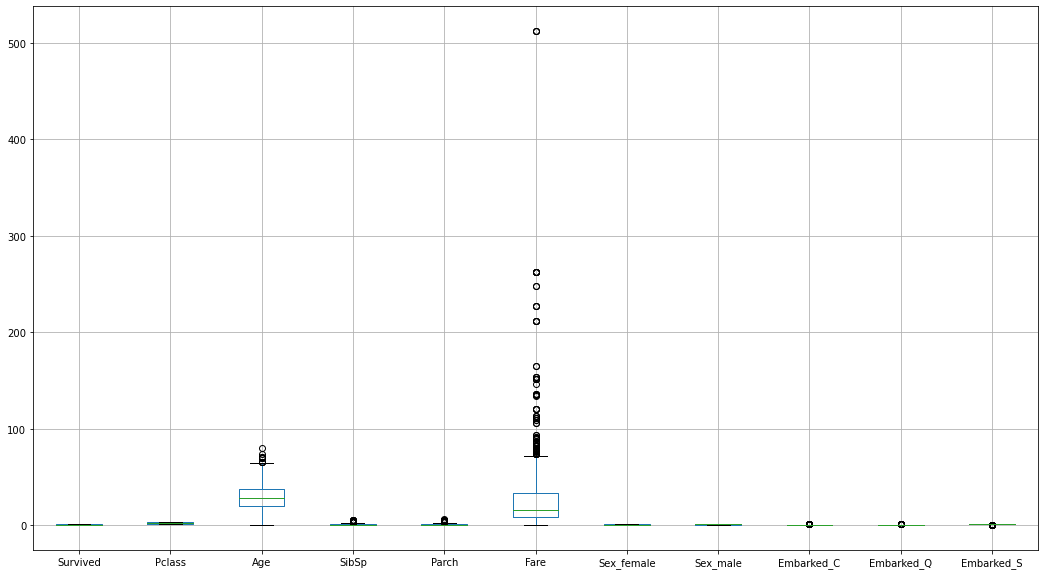

In [26]:
train.boxplot(figsize=(18,10))

In [3]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']

In [10]:
test = pd.read_csv("../Data/test.csv")
test
test['Age'] = test['Age'].replace(np.nan, 26, regex=True)
del test['PassengerId']
del test['Name']
del test['Ticket']
del test['Cabin']
dummies = pd.get_dummies(test[["Sex", "Embarked"]])
del test['Sex']
del test['Embarked']
test['Fare'] = test['Fare'].replace(np.nan, 35.62, regex=True)
test = pd.concat([test, dummies], axis=1)
X_test = test
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,26.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,26.0,0,0,8.0500,0,1,0,0,1


In [11]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        # initialize the list of weights matrices, then store the
        # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha
 
        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
 
        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
 
    def __repr__(self):
        # construct and return a string that represents the network
        # architecture 
        return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))
 
    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))
 
    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that `x` has already been passed through the `sigmoid`
        # function
        return x * (1 - x)
 
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter *within* the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
 
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
 
            # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, loss))
 
    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]
 
        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # take the dot-product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
 
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)
 
            # once we have the net output, add it to our list of
            # activations
            A.append(out)
 
        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final activation
        # in the activations list) and the true target value
        error = A[-1] - y
 
        # from here, we need to apply the chain rule and build our
        # list of deltas `D`; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_deriv(A[-1])]
 
        # once you understand the chain rule it becomes super easy
        # to implement with a `for` loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)
 
        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]
 
        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of
            # the layer activations with their respective deltas,
            # then multiplying this value by some small learning
            # rate and adding to our weight matrix -- this is where
            # the actual "learning" takes place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])
 
    def predict(self, X, addBias=True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
 
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            p = np.c_[p, np.ones((p.shape[0]))]
 
        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value `p`
            # and the weight matrix associated with the current layer,
            # then passing this value through a nonlinear activation
            # function
            p = self.sigmoid(np.dot(p, self.W[layer]))
 
        # return the predicted value
        return p
 
    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
 
        # return the loss
        return loss

In [12]:
nn = NeuralNetwork([10,5,6,1])

In [13]:
nn.fit(X_train,Y_train, epochs=1000)

[INFO] epoch=1, loss=62910.5420210
[INFO] epoch=100, loss=73603.0512307


C:\Users\elian\AppData\Local\Temp\ipykernel_22364\1527977702.py:31: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))


[INFO] epoch=200, loss=75985.6481373
[INFO] epoch=300, loss=71749.4193051
[INFO] epoch=400, loss=67426.7994137
[INFO] epoch=500, loss=70358.8840855
[INFO] epoch=600, loss=70759.5708975
[INFO] epoch=700, loss=71091.6140487
[INFO] epoch=800, loss=72393.8279014
[INFO] epoch=900, loss=69868.8949412
[INFO] epoch=1000, loss=70269.8201292


In [14]:
y_pred = nn.predict(X_test)
y_pred = y_pred.round().tolist()

predictions = []

for i in range(len(y_pred)):
    predictions.append(y_pred[i][0])

predictions

C:\Users\elian\AppData\Local\Temp\ipykernel_22364\1527977702.py:31: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0

In [47]:
test_o = pd.read_csv("test.csv")
data = {'PassengerId' : test_o['PassengerId'],
'Survived' : predictions}

df = pd.DataFrame(data)
df.to_csv('gender_submission.csv', index = False)